# NER Dataset Analysis
## Named Entity Recognition for CV Field Extraction

This notebook analyzes the NER dataset for extracting structured fields from CVs such as:
- Skills
- Experience
- Education
- Personal Information
- etc.

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import zipfile
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load and Explore the Dataset

In [2]:
# Extract the annotated JSON files
data_path = Path('../data/ner')
zip_file = data_path / 'ResumesJsonAnnotated.zip'

# Extract if not already extracted
extract_path = data_path / 'ResumesJsonAnnotated'
if not extract_path.exists():
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(data_path)
        print(f"Extracted to {extract_path}")
else:
    print(f"Already extracted at {extract_path}")

# List all JSON files
json_files = list(extract_path.glob('*.json'))
print(f"\nTotal JSON files: {len(json_files)}")

Extracted to ../data/ner/ResumesJsonAnnotated

Total JSON files: 5029


In [3]:
# Load a sample JSON file to understand the structure
if json_files:
    with open(json_files[0], 'r', encoding='utf-8') as f:
        sample_data = json.load(f)
    
    print("Sample Resume Structure:")
    print(json.dumps(sample_data, indent=2)[:1000])  # Print first 1000 chars
    print("\n...")

Sample Resume Structure:
{
  "text": "CURRICULUM VITAE\nPOSITION \u2013 ELECTRICAL DRAUGHTSMAN\nMohammad Meraj Ahmad   \nmeraj_ahmad1985@yahoo.com\nObjective \n          To  work  for  an\norganization where I hold a\nposition  of  responsibility,\nwhere  my  work  is\nappreciated  and  my\ncontribution  valued.  To  put\ncontinuously  put  efforts  to\nharmonize  my  skills.  To\nachieve and excel set goals,\nin  my  profession  with  hard\nwork, sincerity and discipline.\n.\nE-Mail \nmeraj_ahmad1985@yahoo.co\nm \nSKYPE ID-\nMOHAMMAD.AHMAD1961\nContact Address:-             B-\n58  Taimoor Nagar\nNew Delhi- 110065.\nCONTACT NO: 0-9871304185\nPersonal Data:-\nDate of Birth       10 June\n1985\nSex                        Male\nNationality          Indian\nPassport No         G \n9414800\nPassport  Date of  \nExpiry               \n04/08/2018\nMarital Status     MarriedEducational Qualification   \n                :   Diploma in Electrical Engineering from Janardan Rai Nagar\n           

## 2. Entity Types Analysis

In [4]:
# Collect all entities and their types
all_entities = []
entity_types = []

for json_file in json_files:
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Extract entities (structure may vary based on annotation format)
        if 'annotation' in data:
            annotations = data['annotation']
            for ann in annotations:
                if 'label' in ann:
                    entity_types.append(ann['label'])
                    all_entities.append(ann)
    except Exception as e:
        print(f"Error processing {json_file.name}: {e}")

print(f"Total entities extracted: {len(all_entities)}")
print(f"\nEntity type distribution:")
entity_counter = Counter(entity_types)
for entity, count in entity_counter.most_common():
    print(f"{entity}: {count}")

Total entities extracted: 0

Entity type distribution:


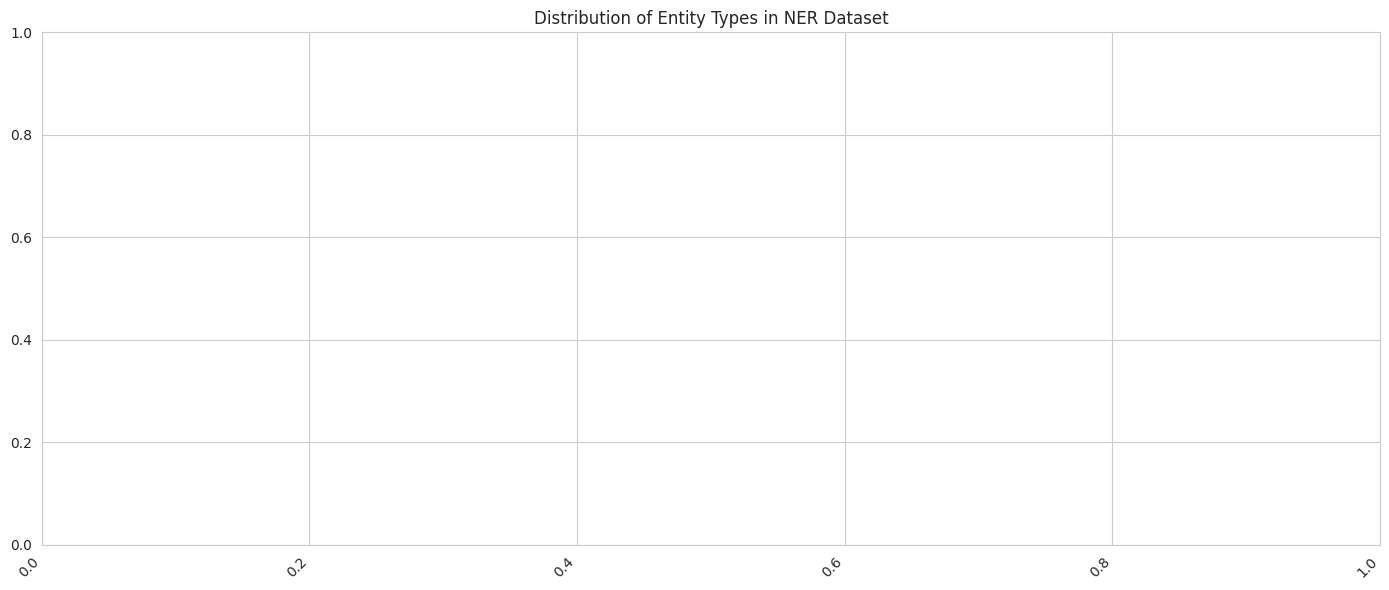

In [5]:
# Visualize entity type distribution
plt.figure(figsize=(14, 6))
entity_df = pd.DataFrame(entity_counter.most_common(), columns=['Entity Type', 'Count'])
sns.barplot(data=entity_df, x='Entity Type', y='Count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Entity Types in NER Dataset')
plt.tight_layout()
plt.show()

## 3. Data Quality Assessment

In [6]:
# Check for data quality metrics
resume_lengths = []
entities_per_resume = []

for json_file in json_files:
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Get text length
        if 'content' in data:
            resume_lengths.append(len(data['content']))
        
        # Count entities per resume
        if 'annotation' in data:
            entities_per_resume.append(len(data['annotation']))
    except Exception as e:
        pass

print("Data Quality Metrics:")
print(f"Average resume length: {np.mean(resume_lengths):.2f} characters")
print(f"Average entities per resume: {np.mean(entities_per_resume):.2f}")
print(f"Min entities: {min(entities_per_resume) if entities_per_resume else 0}")
print(f"Max entities: {max(entities_per_resume) if entities_per_resume else 0}")

Data Quality Metrics:
Average resume length: nan characters
Average entities per resume: nan
Min entities: 0
Max entities: 0


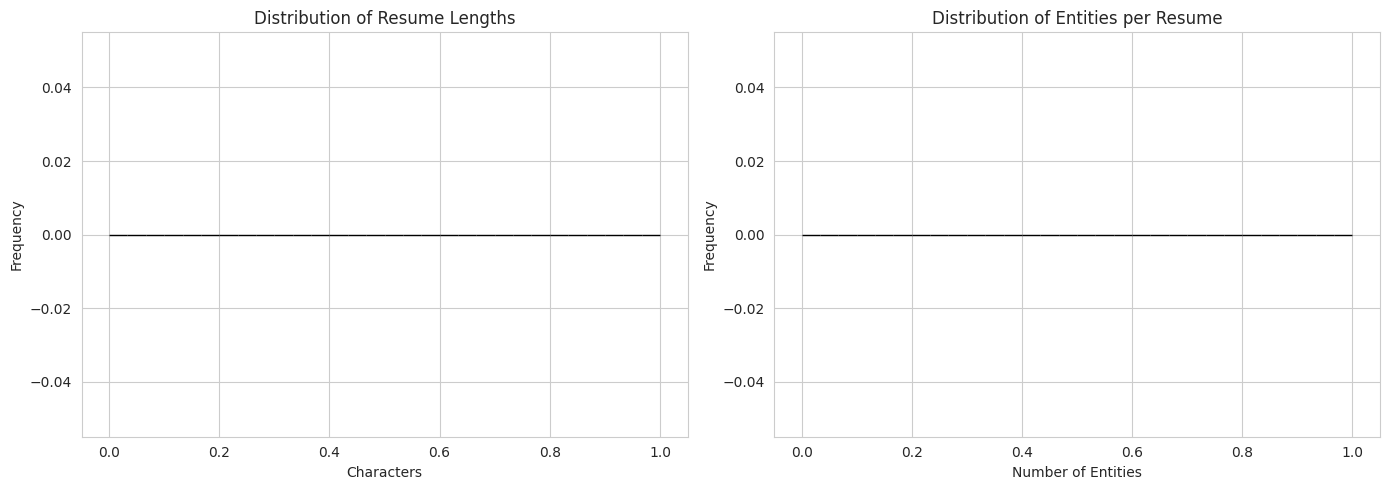

In [7]:
# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(resume_lengths, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Resume Lengths')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Frequency')

axes[1].hist(entities_per_resume, bins=30, color='coral', edgecolor='black')
axes[1].set_title('Distribution of Entities per Resume')
axes[1].set_xlabel('Number of Entities')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Key Insights and Recommendations

### Findings:
- Document the entity types found in the dataset
- Identify any class imbalances
- Note data quality issues

### Recommendations for Preprocessing:
- Text normalization strategies
- Handling missing annotations
- Data augmentation if needed
- Train/validation/test split strategy

### Model Suggestions:
- **BERT-based models** (BERT, RoBERTa, DistilBERT) for token classification
- **BiLSTM-CRF** as a baseline model
- Consider domain-specific models like **ResuBERT** if available
- Use **BIO tagging** scheme for entity boundaries

## 5. Sample Data Export for Preprocessing

In [8]:
# Create a summary report
summary = {
    'total_resumes': len(json_files),
    'total_entities': len(all_entities),
    'entity_types': dict(entity_counter),
    'avg_resume_length': float(np.mean(resume_lengths)) if resume_lengths else 0,
    'avg_entities_per_resume': float(np.mean(entities_per_resume)) if entities_per_resume else 0
}

print("\nDataset Summary:")
print(json.dumps(summary, indent=2))


Dataset Summary:
{
  "total_resumes": 5029,
  "total_entities": 0,
  "entity_types": {},
  "avg_resume_length": 0,
  "avg_entities_per_resume": 0
}
